# <span style="color:#336699">SER-347 - Introdução à Programação para Sensoriamento Remoto</span>
<hr style="border:2px solid #0077b9;">

# <span style="color:#336699">Visualização de Dados em Python com a Matplotlib - Parte III</span>


[<img src="https://matplotlib.org/_static/logo2.svg" alt="Matplotlib is a library for making 2D plots of arrays in Python" style="height: 75px;" align="right">](https://matplotlib.org)


- Gilberto Ribeiro de Queiroz
- Thales Sehn Körting
- Fabiano Morelli
<span style="color:#336699; font-size:1.5em;">
</span>


# 1. Elementos Básicos de um Plot
<hr style="border:1px solid #0077b9;">

Quando construimos uma plotagem como a mostrada na `Figura 1`, o objeto que contém todos os elementos do desenho é chamado de **`Figure`**. Este objeto representa toda a janela/página onde os elementos gráficos são desenhados. A Matplotlib permite criarmos mais de um objeto `Figure` de forma independente um do outro.

<img src="./img/matplotlib/objetos-basicos.png" alt="Elementos da Matplotlib" width="800">
<center><b>Figura 1</b> - Elementos de uma Plotagem com a Matplotlib.</center>

O objeto **`Axes`** corresponde a área de desenho, onde ocorre a plotagem dos dados, dos eixos `x` (X-Axis) e `y` (Y-Axis), dos rótulos dos eixos, do título do gráfico, da grade, da legenda, entre outros elementos possíveis.

Cada objeto `Axes` contém um objeto **`X-Axis`** e um **`Y-Axis`**, representando os eixos da plotagem. Os eixos por sua vez contém as marcas (ou `ticks`) e os rótulos.

Um objeto `Figure` pode conter mais de um objeto `Axes`. Através das funções `subplots` ou `add_subplot` podemos controlar a criação dos objetos `Axes` distribuídos na forma de uma grade regular. Por isso, os objetos `Axes` também são chamados de *subplot*. A `Figura 2` apresenta uma quatro *subplots* (ou objetos `Axes`).

<img src="./img/matplotlib/multiplots.png" alt="Figura composta de vários Axes" width="800">
<center><b>Figura 2</b> - Figura composta por vários *subplots* (`Axes`).</center>

# 2. Inicializando a Matplotlib
<hr style="border:1.0px solid #0077b9;">

Nesta parte do curso iremos utilizar a Matplotlib com o *backend* `nbAgg`. Usaremos o comando mágico `%matplotlib` para definir esse *backend*. Lembre-se que este comando deverá ser a primeira instrução executada em seu notebook jupyter, antes de qualquer comando de importação dos módulos da Matplotlib, como na célula abaixo.

In [1]:
%matplotlib nbagg

import matplotlib as mpl
import matplotlib.pyplot as plt

# 3. Criando um Objeto do Tipo `Figure`
<hr style="border:1.0px solid #0077b9;">

A função `plt.figure` permite criar um novo objeto do tipo `Figure`. 

Podemos controlar o tamanho da figura criada através do parâmetro opcional `figsize`, que é um tupla de números inteiros, correspondendo à `largura` e `altura` da imagem em `polegadas`.

O trecho de código abaixo mostra como criar uma figura de 5" de largura por 4" de altura:

In [ ]:
fig = plt.figure( figsize=(5, 4) )

O trecho de código abaixo mostra como criar uma figura que seja duas vezes mais larga do que sua altura, utilizando a função `plt.figaspect` para calcular essa razão de aspecto:

In [ ]:
fig = plt.figure( figsize=plt.figaspect(0.5) )

**Observação:** Assim como diversos outros parâmetros opcionais na Matplotlib, o valor padrão utilizado em caso de omissão desse argumento na criação de uma nova figura é o valor da chave de configuração `rc.figure.figsize`. Para acessar os valores de configuração, acesse a propriedade `rcParams` no módulo `mpl` ou `plt`, como indicado abaixo:

In [ ]:
print(mpl.rcParams)  # ou: plt.rcParams

# 4. Criando Áreas de Desenho em uma Figura
<hr style="border:1.0px solid #0077b9;">

Toda plotagem ocorre em uma área de desenho que corresponde a um objeto do tipo `Axes`. Para adicionar um novo objeto `Axes` a uma figura (`Figure`), podemos utilizar a função `fig.add_subplot`.

A Matplotlib utiliza a convenção de numerar as áreas de desenho através de uma grade regular.

O trecho de código abaixo, utiliza a função `add_subplot` para adicionar uma única área de desenho, indicada pelo código `111`. Esse código corresponde a uma grade com uma linha e uma coluna, sendo o `Axes` da posição 1 o objeto adicionado. O código de um *subplot* pode ser especificado por um número inteiro de 3 dígitos, como `111`, ou pode ser especificado através de três números, como a tripla `1, 1, 1`.

<IPython.core.display.Javascript object>


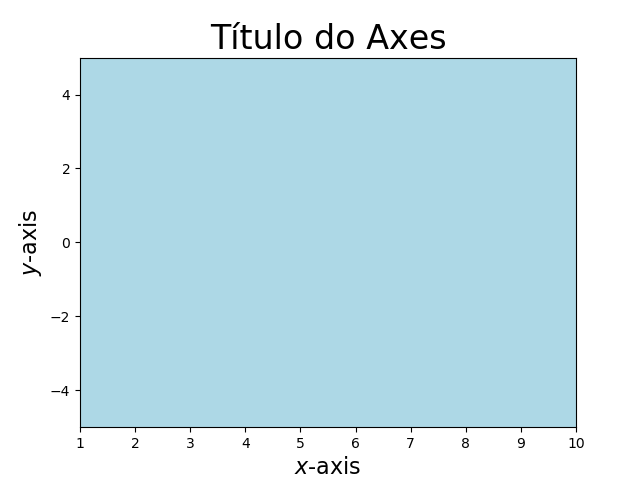

In [2]:
fig = plt.figure()

ax = fig.add_subplot(111, facecolor='lightblue')

ax.set_title("Título do Axes", size=24)

ax.set_xlim([1, 10])
ax.set_ylim([-5, 5])

ax.set_xlabel(r"$x$-axis", size=16)
ax.set_ylabel(r"$y$-axis", size=16);

No trecho de código acima, utilizamos vários métodos com o prefixo `set_` para ajustar propriedades da área de desenho:
- `set_title`: adiciona o texto a ser escrito como título do `Axes`.
- `set_xlim`: define o intervalo das marcas que aparecerão no `eixo-x`.
- `set_ylim`: define o intervalo das marcas que aparecerão no `eixo-y`.
- `set_xlabel`: define o rótulo associado ao `eixo-x`.
- `set_ylabel`: define o rótulo associado ao `eixo-y`.

Para mais detalhes da função [`add_subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), consulte a [documentação da Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot).

**Observação:** Novamente, ressaltamos a possibilidade de usarmos uma [raw string](https://www.digitalocean.com/community/tutorials/how-to-format-text-in-python-3) para facilitar o uso de strings em Python contendo expressões em [LaTeX](https://en.wikibooks.org/wiki/LaTeX).

# 5. Plotando Gráficos sobre a Área de Desenho
<hr style="border:1.0px solid #0077b9;">

As operações para criação de gráficos vistas na primeira parte dessa aula, como `plot`, `scatter`, e `bar`, estão disponíveis sobre objetos do tipo `Axes`.

O trecho de código abaixo apresenta uma senoide criada através da operação `plot` sobre um objeto `Axes`:

<IPython.core.display.Javascript object>


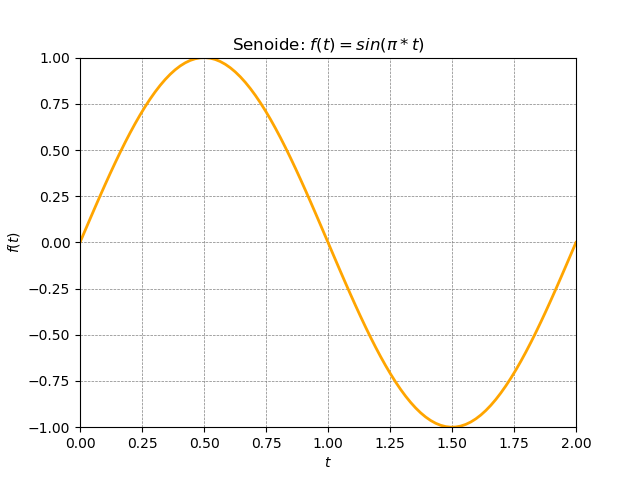

In [3]:
import numpy as np

t = np.linspace(0.0, 2.0, 100)

f = np.sin(np.pi*t)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(t, f, "orange", linewidth=2.0)

ax.set(xlim=[0.0, 2.0], ylim=[-1.0, 1.0],
       title=r"Senoide: $f(t)=sin(\pi*t)$",
       xlabel=r"$t$", ylabel=r"$f(t)$")

ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5);

Repare no código acima que desta vez utilizamos a função geral `set` para definir várias propriedades do gráfico de uma só vez. O uso das funções `set_` são necessárias quando queremos explicitar outras opções associadas a uma mesma propriedade, como o tamanho do texto associado a um rótulo no exemplo anterior:
```python
ax.set_xlabel(r"$x$-axis", size=20)
```

# 6. Axes versus pyplot
<hr style="border:1.0px solid #0077b9;">

Na primeira parte da aula sobre Matplotlib, utilizamos sua interface baseada em estados, manipulando o objeto [`matplotlib.pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) (com o *alias* `plt`). O objeto [`pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) mantém informações sobre a plotagem *corrente*, isto é, dos objetos criados pela última chamada a uma operação que produz algum tipo de desenho, como as operações `plot`, `bar`, `scatter`, e `hist`. Por isso, operações como `plt.title`, `plt.xlabel`, e `plt.ylabel`, são aplicadas corretamente ao desenho dos gráficos vistos nos exemplos da primeira parte.

Nesta parte da aula, vocês viram que os objetos `Axes` possuem os mesmos métodos existentes no objeto `pyplot`, às vezes com uma sútil diferença, como por exemplo `plt.xlim` e `ax.set_xlim` ou `plt.title` e `ax.set_tile`.

A interface via `pyplot` é adequada para criação de pequenas visualizações, como as que fizemos na primeira parte da aula.

Para plotagens mais complexas, criadas por scripts maiores ou com vários *subplots*, podemos utilizar os objetos `Figure` e `Axis` de maneira explícita, como no trecho de código abaixo:

<IPython.core.display.Javascript object>


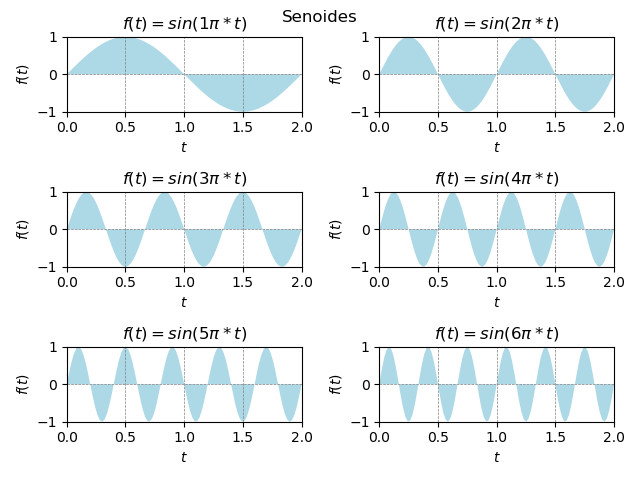

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=2)

t = np.linspace(0.0, 2.0, 100)

i = 1

for ax in axes.flat:
    f = np.sin(i * np.pi * t)

    ax.fill(t, f, "lightblue")

    ax.set_title("$f(t)=sin({}\pi*t)$".format(i))

    ax.set_xlim([0.0, 2.0])
    ax.set_ylim([-1.0, 1.0])

    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$f(t)$")

    ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5)

    i += 1

    
fig.suptitle("Senoides")

fig.tight_layout()

A função `plt.subplots` constrói uma figura (objeto `Figure`) e uma matriz de *subplots*, que é um *array* NumPy com objetos `Axes`:

In [5]:
type(fig)

matplotlib.figure.Figure

In [6]:
type(axes)

numpy.ndarray

No caso específico do exemplo acima, criamos uma matriz $3 \times 2$ do `NumPy` com *subplots*:

In [7]:
axes.shape

(3, 2)

Uma funcionalidade interessante consiste no compartilhamento das marcas ao longo dos eixos `x` e `y`, como mostrado no exemplo abaixo:

<IPython.core.display.Javascript object>


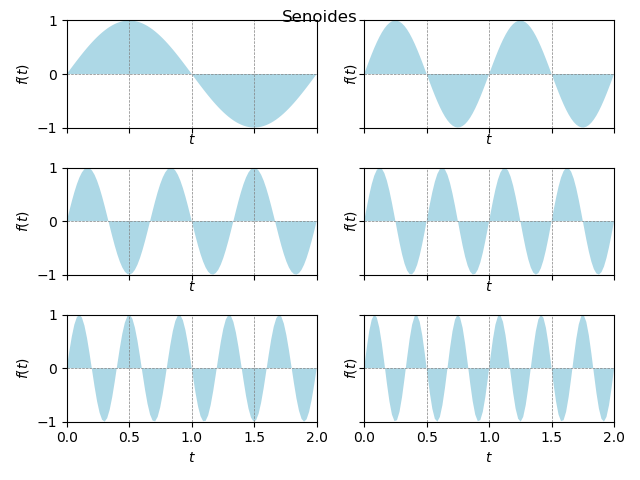

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='all', sharey='all')

t = np.linspace(0.0, 2.0, 100)

i = 1

for ax in axes.flat:
    f = np.sin(i * np.pi * t)

    ax.fill(t, f, "lightblue")

    #ax.set_title("$f(t)=sin({}\pi*t)$".format(i))

    ax.set_xlim([0.0, 2.0])
    ax.set_ylim([-1.0, 1.0])

    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$f(t)$")

    ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5)

    i += 1

    
fig.suptitle("Senoides")

fig.tight_layout()

Repare nos gráficos criados que apenas os eixos à esquerda e abaixo possuem marcas.

Para mais detalhes da função [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots), consulte a [documentação da Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots).

# Referências Bibliográficas
<hr style="border:1px solid #0077b9;">

- [Artist tutorial](https://matplotlib.org/tutorials/intermediate/artists.html#artist-tutorial). Data de Acesso: 06 de Abril de 2018<br><br>

- [Tight Layout guide](https://matplotlib.org/users/tight_layout_guide.html). Data de Acesso: 06 de Abril de 2018.<br><br>

- Ben Root. [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib). Data de Acesso: 06 de Abril de 2018.<br><br>